![Shipmnt](https://d1qb2nb5cznatu.cloudfront.net/startups/i/823885-206e3154d7d005bfd676bfcc573b088f-medium_jpg.jpg?buster=1481112387)

In this notebook we are going to extract the data from the pdfs assigned in the assignment. The PDF's are random, very unorganized information given. The given PDFs are the airway bill of various operations taking place. Here we are going to be working on the extracting useful information from the tables similarity based on [this paper](https://pdfs.semanticscholar.org/f805/a2c0601c3b6b4decc97f0a360daf85085a74.pdf).

Lets begin!!!

In [1]:
from processing import extractText
import os
import numpy as np
import pandas as pd
from pandas.io.json import json_normalize
from matplotlib import pyplot as plt
%matplotlib inline
import json
import warnings
warnings.filterwarnings('ignore')

In [2]:
identify = json_normalize(json.loads(open('./Data/identify_codes.json','r').read()),
                          ['house'],['ID','OagCode'])
identify.ID=identify.ID.astype(int)
identify=identify.sort_values("ID")
identify.head()

,CneeCode,ShprCode,ID,OagCode
15,92945,5230,2608157,632
13,8482,38138,2608157,632
14,42458,873,2608157,632
12,101469,25562,2608158,632
11,30665,65750,2608159,632


In [3]:
# Normalize the json and create a data frame
document_map = json_normalize(json.loads(open('./Data/document_label.json','r').read()),['Attachment','Page:'],['ID'])
#remove other than HWAB
document_map=document_map[document_map.DocType=='HAWB']
document_map.head()

,DocType,PageID,Path,ID
2,HAWB,3,AICST/MF/HAWB/233339-JFK3404_30342017100103520...,2608157
3,HAWB,4,AICST/MF/HAWB/233340-JFK3404_30342017100103520...,2608157
4,HAWB,5,AICST/MF/HAWB/233341-JFK3404_30342017100103520...,2608157
7,HAWB,3,AICST/MF/HAWB/233338-JFK3393_22942017100103520...,2608158
10,HAWB,3,AICST/MF/HAWB/233337-JFK3451_24922017100103520...,2608159


In [4]:
print(identify.dtypes)
print(document_map.dtypes)

CneeCode    object
ShprCode    object
ID           int64
OagCode     object
dtype: object
DocType    object
PageID      int64
Path       object
ID          int64
dtype: object


Now that we have already done loading our primary tables in the notebook, we are going to check how many of the files link provided actually contain the files. The pdf here are only of HAWB as it is the only point of interest right now.

Lets calculate

In [5]:
cnt=0
for i,j in zip(document_map.Path.index, document_map.Path):
    if os.path.exists(j.replace('\\','/')):
        cnt+=1
        
print(cnt)

401


Of all the mentioned files, only 401 exist which is this fraction


([<matplotlib.patches.Wedge at 0x7f2d3f2a2e10>,
 [Text(2.15118,0.460878,'Exists'), Text(-2.15118,-0.460878,'DoesNotExist')])

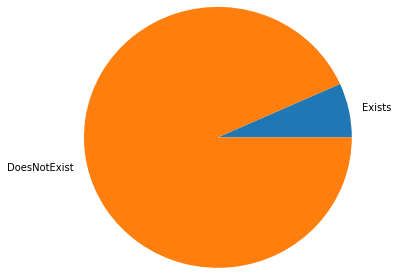

In [6]:
print('Of all the mentioned files, only 401 exist which is this fraction')

plt.figure(figsize=(3,3))
plt.pie([cnt, document_map.shape[0]],labels=['Exists','DoesNotExist'], radius=2)

We can clearly see here the files in the dataset with the size of the dataset. 

Lets try to work on the provided files itself and then try to get maximum possible data from the dataset.

As we have already seen that the maximum number of invoices belong to *HERMES TRANSPORT LOGISTICS*. So we will primarily try to match the similarity with the *HERMES'* invoices and if the match is not found, we are going to proceed and check for other templates. We have specifically chosen forwarders with most number of files here to ease our process of matching files in the dataset. If you want, you can have a look at the  [preprocessing file](https://github.com/Thanatoz-1/Taks/) for codes.

In [7]:
cnt=0
document_map['From']=np.nan
document_map['To']=np.nan
for index, file in zip(document_map.index, document_map.Path):
    try:
        extract=extractText(file)
        if extract!=None:
            vals=extract
            print(index, vals[0].split()[0].upper(),vals[1].split()[0].upper())
            try:
                document_map['From'][index]=vals[0].split()[0].upper()
                document_map['To'][index]=vals[1].split()[0].upper()
            except Exception as e:
                print(e)
            cnt+=1
#     print(index, file)
    except:
        pass
    
print(cnt)

4761 FRANKFURT DELHI
4764 AIRPORT DESTINATION
4783 HAMBURG MADRAS
4791 BRUSSELS BOMBAY
4794 BRATISLAV DELHI
4828 BY INFORMATION
4833 FRANKFURT DELHI
4834 FRANKFURT DELHI
4839 BRUSSELS BOMBAY
4840 BRUSSELS BOMBAY
4841 BRUSSELS BOMBAY
4857 FRANKFURT MUMBAI
4858 FRANKFURT MUMBAI
4859 FRANKFURT MUMBAI
4861 FRANKFURT BANGALORE
4880 DEPARTURE AIRPORT
4881 DEPARTURE AIRPORT
4906 BRUSSELS BOMBAY
4907 BRUSSELS BOMBAY
4908 BRUSSELS BOMBAY
4912 BRUSSELS BOMBAY
4913 BRUSSELS BOMBAY
4914 BRUSSELS BOMBAY
4942 BRUSSELS BOMBAY
4943 BRUSSELS BOMBAY
4944 BRUSSELS BOMBAY
4945 BRUSSELS BOMBAY
4948 BRUSSELS BOMBAY
4951 FRANKFURT DELHI
4956 DEPARTURE AIRPORT
4967 BY INFORMATION
5012 FRANKFURT MADRAS
5039 DEPARTURE AIRPORT
5078 FRANKFURT DELHI
5103 DEPARTURE AIRPORT
5106 DEPARTURE AIRPORT
5107 DEPARTURE AIRPORT
5108 DEPARTURE AIRPORT
5123 BRUSSELS BOMBAY
5136 AMSTERDA BANGALORE
5145 AMSTERDA NEW
5148 FRANKFURT DELHI
5156 DEPARTURE AIRPORT
5157 DEPARTURE AIRPORT
5175 FRANKFURT BANGALORE
5185 DEPARTURE AIRPORT

In [8]:
document_map.head()

,DocType,PageID,Path,ID,From,To
2,HAWB,3,AICST/MF/HAWB/233339-JFK3404_30342017100103520...,2608157,NaN,NaN
3,HAWB,4,AICST/MF/HAWB/233340-JFK3404_30342017100103520...,2608157,NaN,NaN
4,HAWB,5,AICST/MF/HAWB/233341-JFK3404_30342017100103520...,2608157,NaN,NaN
7,HAWB,3,AICST/MF/HAWB/233338-JFK3393_22942017100103520...,2608158,NaN,NaN
10,HAWB,3,AICST/MF/HAWB/233337-JFK3451_24922017100103520...,2608159,NaN,NaN


We can see that the obtained results we have got so far contains noise too. This noise can easily be cleaned by performing some manual cleaning of the csv

In [8]:
document_map.to_csv('./Data/document_features.csv')

In [18]:
document_map=pd.read_csv('./Data/document_features.csv')

In [19]:
document_map.drop_duplicates(subset=['ID']).to_csv('./Data/test.csv')

#### Goto
<button onclick="location.href='https://tushardhyani.ml/Taks/html'" style='float:left;' type="button">Home</button>

<button onclick="location.href='https://tushardhyani.ml/Taks/html/EDA'" style='margin-left:33%' type="button">Extract</button>
<button onclick="location.href='https://tushardhyani.ml/Taks/html/Model'" style='float:right;' type="button">Model</button>

